In [5]:
from textblob import TextBlob

In [1]:
import pandas as pd
df = pd.read_csv('Saudi.csv')

print(df.info())

print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3330 entries, 0 to 3329
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   author        3328 non-null   object 
 1   published_at  3257 non-null   object 
 2   updated_at    3257 non-null   object 
 3   like_count    3257 non-null   float64
 4   text          3257 non-null   object 
dtypes: float64(1), object(4)
memory usage: 130.2+ KB
None
                 author          published_at            updated_at  \
0    @Lukuinhasoliveira  2024-11-02T01:03:23Z  2024-11-02T01:03:23Z   
1            @zeyad1693  2024-10-25T10:19:43Z  2024-10-25T10:19:43Z   
2      @UmiKulsum-um4dc  2024-10-16T08:36:07Z  2024-10-16T08:36:07Z   
3       @prometheus1836  2024-10-15T19:23:54Z  2024-10-15T19:23:54Z   
4  @miguelsotomayor5786  2024-10-10T15:02:17Z  2024-10-10T15:02:17Z   

   like_count                                               text  
0         0.0                           

In [2]:

like_stats = df['like_count'].describe()
print("Like Count Statistics:")
print(like_stats)

top_liked = df.nlargest(10, 'like_count')[['author', 'text', 'like_count']]
print("\nTop 10 Most Liked Comments:")
print(top_liked)

Like Count Statistics:
count     3257.000000
mean        24.953638
std        407.400075
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max      13408.000000
Name: like_count, dtype: float64

Top 10 Most Liked Comments:
                     author  \
3325        @barbarooza8408   
3265            @Cmillzwrld   
3239      @ahmarelvirgio823   
3323      @michelleowen4127   
3199         @-MarcelDavis-   
3253   @gigaazzahrawani6456   
1294        @kirboturbo6932   
1753  @SticksAandstonesBozo   
2582       @oborocmaxim3389   
802      @raymartfangon9715   

                                                   text  like_count  
3325               Admin quicker than this years Alpine     13408.0  
3265  Bearman is now #10 in the driver&#39;s champio...     12920.0  
3239  Last year: 5 seconds time penalty for Ocon<br>...      8188.0  
3323  Hats off to BearMan, starting P11 and finishin...      8150.0  
3199  That team radio with Stroll is pure comed

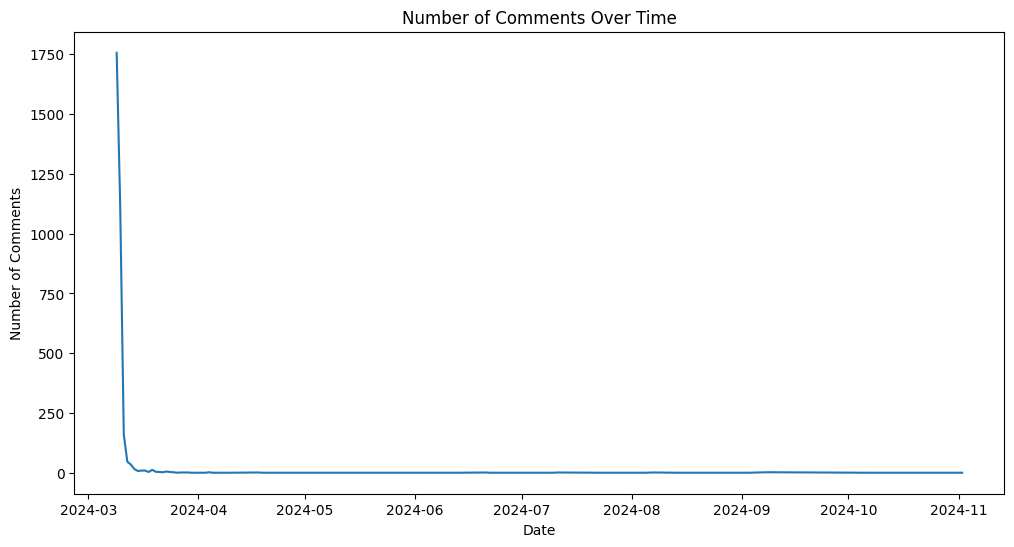

In [3]:
import matplotlib.pyplot as plt

df['published_at'] = pd.to_datetime(df['published_at'])

comments_per_day = df.groupby(df['published_at'].dt.date).size()
plt.figure(figsize=(12, 6))
comments_per_day.plot()
plt.title('Number of Comments Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.show()

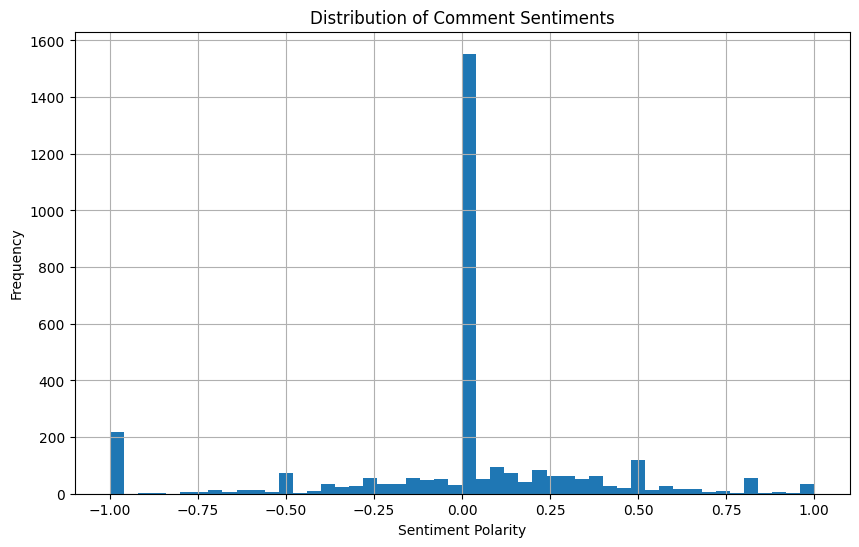

Average Sentiment: -0.01


In [7]:
df['text'] = df['text'].astype(str).replace('nan', '')
def get_sentiment(text):
    if text.strip():
        return TextBlob(text).sentiment.polarity
    else:
        return None
df['sentiment'] = df['text'].apply(get_sentiment)

plt.figure(figsize=(10, 6))
df['sentiment'].hist(bins=50)
plt.title('Distribution of Comment Sentiments')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

print(f"Average Sentiment: {df['sentiment'].mean():.2f}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


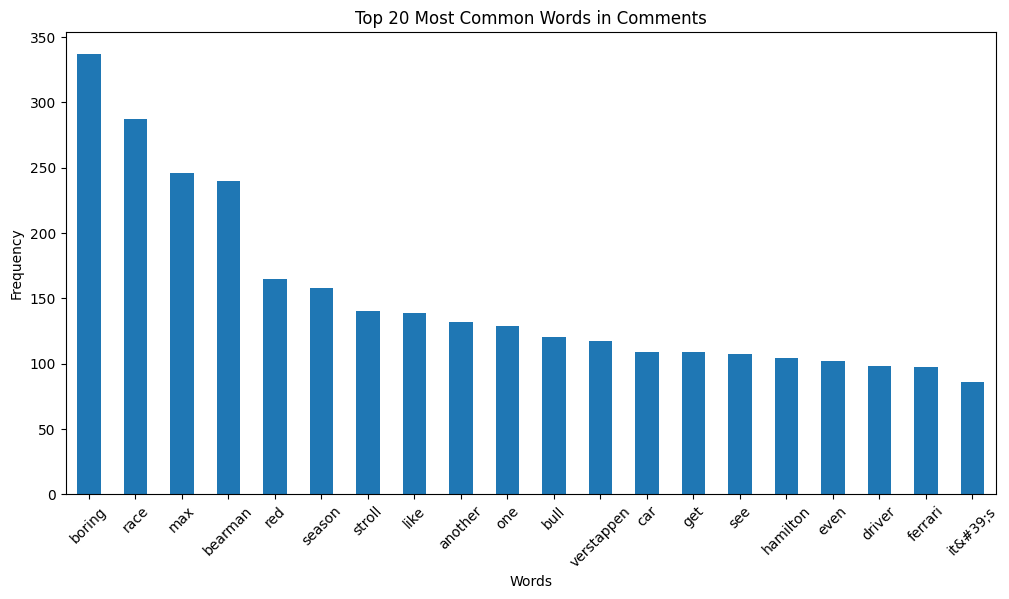

In [8]:
from collections import Counter
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def get_word_freq(text):
    words = text.lower().split()
    return Counter(word for word in words if word not in stop_words and len(word) > 2)

all_words = get_word_freq(' '.join(df['text']))

plt.figure(figsize=(12, 6))
pd.Series(dict(all_words.most_common(20))).plot(kind='bar')
plt.title('Top 20 Most Common Words in Comments')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [9]:

user_comment_counts = df['author'].value_counts()

print("Top 10 Most Active Commenters:")
print(user_comment_counts.head(10))

Top 10 Most Active Commenters:
author
<br>                  8
@BilbroBaginz         4
@AdsTezzori           4
@MegatronRacing237    3
@OscarZheng50         3
@into_the_void        3
@GabrielFresenius     3
@rishigupta8949       3
@CanonTogger717       3
@DrDeepstack          3
Name: count, dtype: int64


In [10]:
correlation = df['sentiment'].corr(df['like_count'])
print(f"Correlation between sentiment and likes: {correlation:.2f}")

Correlation between sentiment and likes: 0.02
